In [1]:
!pip install git+https://github.com/tensorflow/docs

#import
from google.colab import files
import io
import datetime
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-_y6l69v2
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-_y6l69v2
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.09c767b21ec238bb0fe8561f6596f5dcdce915c4e_-cp36-none-any.whl size=100470 sha256=e8ceb529845f0de92e5db497a689111e4756e4279b3a2e0c25d44d6d2ddf5cbf
  Stored in directory: /tmp/pip-ephem-wheel-cache-716jkzh8/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import truelayer account data
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['export.csv'])) 
print(df)

Saving export.csv to export.csv
     day   total  final_spend
0      1  100.63       841.26
1      2  131.22       841.26
2      3  771.95       841.26
3      6  841.26       841.26
4      0   62.66      1286.48
..   ...     ...          ...
257    2  312.33       767.34
258    3  356.92       767.34
259    4  507.96       767.34
260    5  661.48       767.34
261    6  767.34       767.34

[262 rows x 3 columns]


In [0]:

#construct train and test sets
dftrain = df.sample(frac=0.75)
dfeval = df.drop(dftrain.index)

y_train = dftrain.pop('final_spend')
y_eval = dfeval.pop('final_spend')

In [0]:
#Build neural network
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(dftrain.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()


In [13]:
# The patience parameter is the amount of epochs to check for improvement
EPOCHS = 100
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

early_history = model.fit(dftrain, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1408179.8750,  mae:1069.6521,  mse:1408179.8750,  val_loss:1517700.3750,  val_mae:1130.3430,  val_mse:1517700.3750,  
............................................................................................

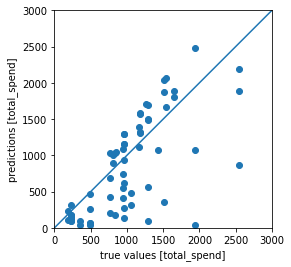

In [14]:
test_predictions = model.predict(dfeval).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_eval, test_predictions)
plt.xlabel('true values [total_spend]')
plt.ylabel('predictions [total_spend]')
lims = [0, 3000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

39.430814144306446


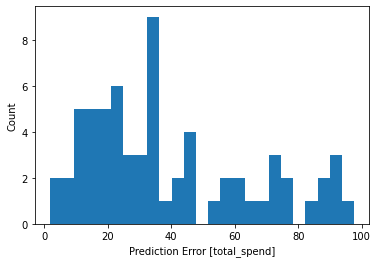

In [15]:
def Average(x): 
    return sum(x) / len(x) 
    
error = abs((test_predictions - y_eval)/y_eval * 100)
print(Average(error))
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [total_spend]")
_ = plt.ylabel("Count")

In [8]:
#Save model 
saved_model_dir = '/content/drive/My Drive/Colab Notebooks/saved'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()
with open("/content/drive/My Drive/Colab Notebooks/converted_model.tflite", "wb") as f:
  f.write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/saved/assets


In [9]:
36,

(36,)